## **Zadanie 1**


---




W niniejszym zadaniu przyjrzymy się trzem numerycznym metodom wyliczania pochodnej funkcji. Są to: \


1.   Metoda różnic prawostronnych: \
$$\frac{ \partial }{ \partial t}f(t) = \lim\limits_{h \to 0}\frac{f(t+h)-f(t)}{h},$$

2.   Metoda różnic lewostronnych: \
$$\frac{ \partial }{ \partial t}f(t) = \lim\limits_{h \to 0}\frac{f(t)-f(t-h)}{h},$$
3.  Metoda różnic centralnych: \
$$\frac{ \partial }{ \partial t}f(t) = \lim\limits_{h \to 0}\frac{f(t+h)-f(t-h)}{2h}.$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def diffBackward(fun, x, h):
  return (fun(x)[1:] - fun(x)[:-1])/h

def diffForward(fun, x, h):
  return (fun(x)[1:] - fun(x)[:-1])/h

def diffCentral(fun, x, h):
  return (fun(x)[2:] - fun(x)[:-2])/(2*h)

Działanie powyższych metod testować będziemy na trzech funkcjach:



*   $f_1(x) = \cos(x)$,
*   $f_2(x) = \cos(100x)$,
*   $f_3(x) = \begin{cases}
 \frac{sin(x)}{x}& \text{ if } x \neq 0 \\
 1& \text{ if } x= 0
\end{cases},$

na przedziale $x \in [-1,1]$.


---


Aby ocenić jakość stosowanych metod, porównamy wartości pochodnych uzyskane numerycznie z ich dokładnymi odpowiednikami, wyliczonymi na podstawie: \



*   $f'_1(x) = -\sin(x),$
*   $f'_2(x) = -100\sin(100x),$
*   $f'_3(x) = \begin{cases}
 -\frac{sin(x)-x\cos(x)}{x^2},& \text{ gdy } x \neq 0 \\
 0, & \text{ gdy } x= 0
\end{cases}.$


In [ ]:
f1 = lambda x: np.cos(x)
f2 = lambda x: np.cos(100*x)
f3 = lambda x: np.where(np.abs(x) > 10**(-10), np.sin(x)/x, 1)

y1 = lambda x: -1* np.sin(x)
y2 = lambda x: -100*np.sin(100*x)
y3 = lambda x: np.where(np.abs(x) > 10**(-10), -1*((np.sin(x)-x*np.cos(x))/x**2), 0)

h_steps = np.arange(10**(-3), 1, 10**(-3))

In [ ]:
# @title
def zad1(y_true, fun):
  error_forw = []
  error_back = []
  error_centr = []
  h_steps = np.arange(10**(-3),1,10**(-3))
  for h in h_steps:
    x = np.arange(-1,1,h)
    error_forw.append(np.mean(np.abs(y_true(x[:-1])-diffForward(fun,x,h))))
    error_back.append(np.mean(np.abs(y_true(x[1:])-diffBackward(fun,x,h))))
    error_centr.append(np.mean(np.abs(y_true(x[1:-1])-diffCentral(fun,x,h))))
  return error_forw, error_back, error_centr

In [ ]:
# @title
import warnings
warnings.filterwarnings('ignore')
error_f1, error_b1, error_c1 = zad1(y1, f1)
error_f2, error_b2, error_c2 = zad1(y2, f2)
error_f3, error_b3, error_c3 = zad1(y3, f3)




---


Przyjrzyjmy się poniższym wykresom funkcji błędu w zależności od przyjętego kroku $h$.

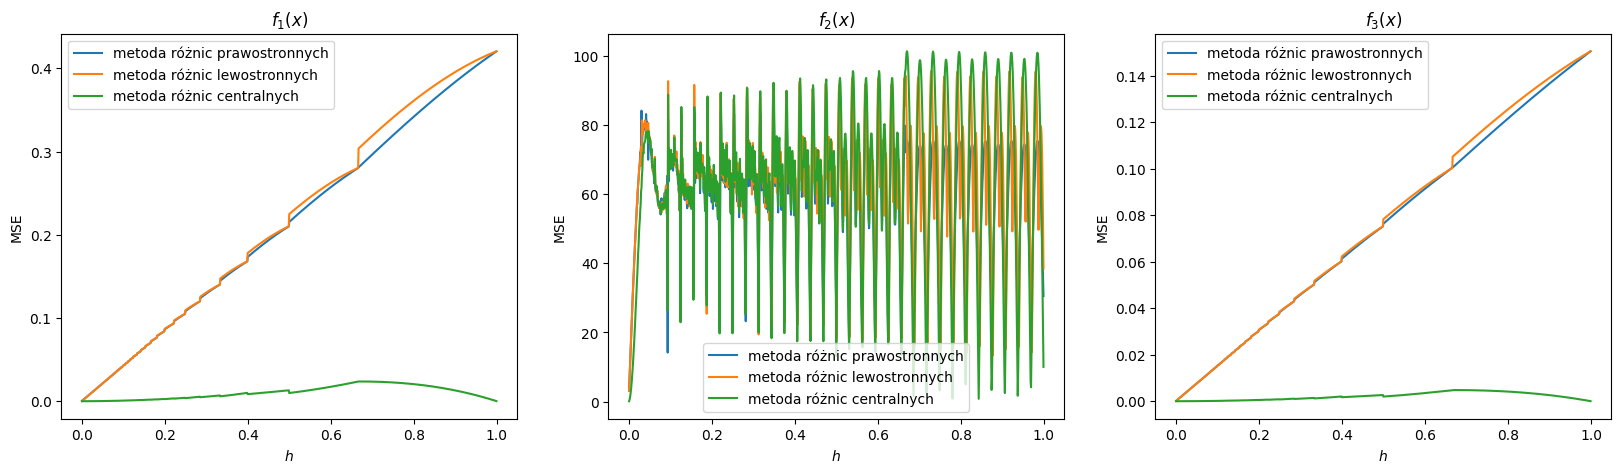

In [ ]:
# @title
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].plot(h_steps, error_f1, label="metoda różnic prawostronnych")
axs[0].plot(h_steps, error_b1, label="metoda różnic lewostronnych")
axs[0].plot(h_steps, error_c1, label="metoda różnic centralnych")
axs[0].set_ylabel("MSE")
axs[0].set_xlabel("$h$")
axs[0].set_title("$f_1(x)$")
axs[0].legend()
axs[1].plot(h_steps, error_f2, label="metoda różnic prawostronnych")
axs[1].plot(h_steps, error_b2, label="metoda różnic lewostronnych")
axs[1].plot(h_steps, error_c2, label="metoda różnic centralnych")
axs[1].set_ylabel("MSE")
axs[1].set_xlabel("$h$")
axs[1].set_title("$f_2(x)$")
axs[1].legend()
axs[2].plot(h_steps, error_f3, label="metoda różnic prawostronnych")
axs[2].plot(h_steps, error_b3, label="metoda różnic lewostronnych")
axs[2].plot(h_steps, error_c3, label="metoda różnic centralnych")
axs[2].set_ylabel("MSE")
axs[2].set_xlabel("$h$")
axs[2].set_title("$f_3(x)$")
axs[2].legend()
plt.show()

Metoda różnic centralnych jest najbardziej precyzyjna. Charakteryzuje się najniższym błędem średniokwadratowym - dla $f_1$ oraz $f_3$, wzrost $h$ nie wpływa znacząco na wartość MSE. \

Z kolei etody różnic prawo/lewo - stronnych dają rezultaty o błędach na bardzo zbliżonym poziomie. Obserwujemy także liniową zależność MSE i $h$. \

Jednakże dla $f_2 = \cos(x)$ zauważamy znaczną niestabilność funkcji błędu niezależnie od użytej metody. Wraz ze wzrostem $h$, funkcja coraz gwałtowniej wzrasta i spada. Wynika to z wysokiej częstotliwości oscylacji funkcji $\cos(100x)$:

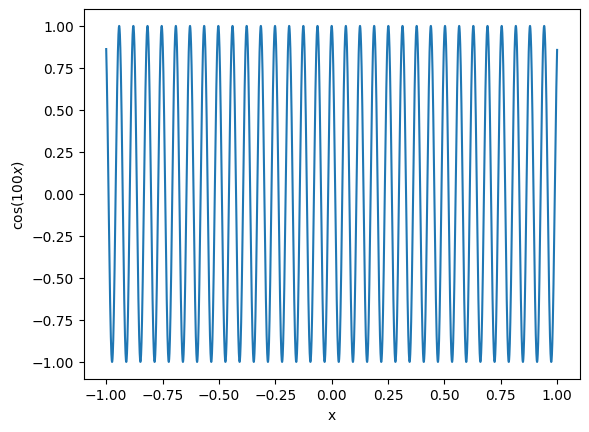

In [ ]:
# @title
x = np.arange(-1,1,0.0001)
plt.plot(x,f2(x))
plt.xlabel("x")
plt.ylabel("$\cos(100x)$")
plt.show()

# **Zadanie 2**


---



Skupimy się teraz na numerycznym obliczaniu całek funkcji przedstawionych w zadaniu 1. Wykorzystamy do tego metodę:


1.   prostokątów lewostronnych: $\int_{a}^{b}f(x)\approx \frac{b-a}{n}\sum\limits_{i=0}^{n-1}f_i$,
2.   prostokątów prawostronnych: $\int_{a}^{b}f(x)\approx \frac{b-a}{n}\sum\limits_{i=0}^{n-1}f_{i+1}$,
3.   trapezów: $\int_{a}^{b}f(x)\approx \frac{b-a}{n}\sum\limits_{i=0}^{n-1}f_{i+\frac{1}{2}}$.


In [ ]:
def integrateRight(fun, x, h):
  return np.sum(fun(x[1:])*h)

def integrateLeft(fun, x, h):
  return np.sum(fun(x[:-1])*h)

def integrateTrapez(fun, x, h):
  y = fun(x)
  return h/2*(y[0]+y[-1] + 2*np.sum(y[1:-1]))



---


Po obliczeniu numerycznych wartości całek, porównamy je z dokładnymi wartościami. Ponownie, zwrócimy uwagę jak krok $h$ wpływa zmianę błędu. Poniżej przedstawiamy wzory analityczne całek dla funkcji z zadania 1.



*   $\int f_1(x) dx = \sin(x),$
*   $\int f_2(x) dx = \frac{\sin(100x)}{100},$
*   $\int f_3(x) dx = \begin{cases}
 Si(x),& \text{ gdy } x \neq 0 \\
 x, & \text{ gdy } x= 0
\end{cases}.$


In [ ]:
from scipy.special import sici
y1 = lambda x: np.sin(x)
y2 = lambda x: np.sin(100*x)/100
y3 = lambda x: np.where(np.abs(x) > 10**(-15), sici(x)[0], x)

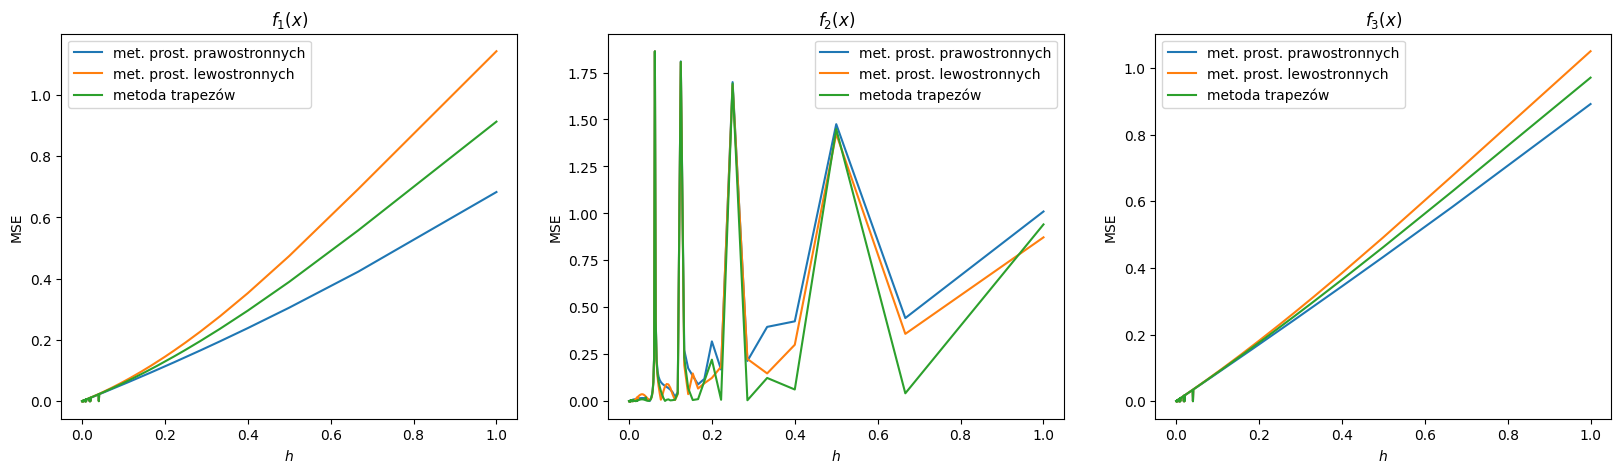

In [ ]:
# @title
warnings.filterwarnings('ignore')
def zad2(y_true,fun):
  error_R = []
  error_L = []
  error_T = []
  n_max = 10000
  h_steps = [2/n for n in range(2, n_max)]
  for h in h_steps:
    x = np.arange(-1, 1, h)
    error_R.append(np.abs((y_true(1)-y_true(-1))-integrateRight(fun, x, h)))
    error_L.append(np.abs(y_true(1)-y_true(-1)-integrateLeft(fun, x, h)))
    error_T.append(np.abs(y_true(1)-y_true(-1)-integrateTrapez(fun,x, h)))
  return error_R, error_L, error_T

h_steps = [2/n for n in range(2, 10000)]
error_f1, error_b1, error_c1 = zad2(y1, f1)
error_f2, error_b2, error_c2 = zad2(y2, f2)
error_f3, error_b3, error_c3 = zad2(y3, f3)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].plot(h_steps, error_f1, label="met. prost. prawostronnych")
axs[0].plot(h_steps, error_b1, label="met. prost. lewostronnych")
axs[0].plot(h_steps, error_c1, label="metoda trapezów")
axs[0].set_ylabel("MSE")
axs[0].set_xlabel("$h$")
axs[0].set_title("$f_1(x)$")
axs[0].legend()
axs[1].plot(h_steps, error_f2, label="met. prost. prawostronnych")
axs[1].plot(h_steps, error_b2, label="met. prost. lewostronnych")
axs[1].plot(h_steps, error_c2, label="metoda trapezów")
axs[1].set_ylabel("MSE")
axs[1].set_xlabel("$h$")
axs[1].set_title("$f_2(x)$")
axs[1].legend()
axs[2].plot(h_steps, error_f3, label="met. prost. prawostronnych")
axs[2].plot(h_steps, error_b3, label="met. prost. lewostronnych")
axs[2].plot(h_steps, error_c3, label="metoda trapezów")
axs[2].set_ylabel("MSE")
axs[2].set_xlabel("$h$")
axs[2].set_title("$f_3(x)$")
axs[2].legend()

plt.show()

Analizując wykresy błędów dla trzech badanych funkcji, zauważamy, że metoda prostokątów prawostronnych jest najbardziej precyzyjna dla $f_1$ oraz $f_3$. W przypadku tych funkcji, błąd MSE rośnie wraz ze wzrostem $h$, dla wszystkich trzech metod. Natomiast dla funkcji $cos(100x)$ ponownie zauważamy dużą niestabilność, bez wyrażnej zależności od wiekości kroku $h$. Możemy więc wnioskować, że numeryczne metody całkowania / różniczkowania działają gorzej dla funkcji o większej częstotliwości oscylacji.

# **Zadanie 3**


---



Metoda Newtona w sposób iteracyjny znajduje przybliżenie pierwiastka funkcji rzeczywistej zaczynając od wybranego punktu $x_0$. W każdej iteracji obliczamy nowe przybliżenie korzystając ze wzoru
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} = x_n - \frac{f(x_n)-f(x_n-h)}{h},$$
dla $h>0$.  

Iterujemy dopóki różnica $|x_{n+1} - x_n|$, będzie mniejsza niż ustalony błąd bądź osiągnięta zostanie maksymalna liczba iteracji.

In [ ]:
def newton(f, x0, epsilon, h, n=100):
  counter = 0
  err = 1
  while (err > epsilon) and counter < n:
    f_prim = (f(x0) - f(x0 - h)) / h
    if abs(f_prim) < 10**(-16):
      return x0, counter
    x1 = x0 - f(x0) / f_prim
    err = abs(x1 - x0)
    x0 = x1
    counter +=1
  return x0, counter



---


Naszym zadaniem jest znalezienie punktu przecięcia funkcji $g_1(x) = \cos(x)$ oraz $g_2(x) = x$ oraz tempa zbieżności w zależności od $x_0$ oraz kroku $h$. Szukamy zatem pierwiastka funkcji $g(x) = \cos(x) - x$. \
Jako, że metoda Newtona polega na aktualizacji wartości $x_n$ w każdej iteracji, przyjrzyjmy się wykresom funkcji $g(x) = \cos(x)-x$, $g'(x) = -\sin(x)-1$ oraz ilorazowi $\frac{g(x)}{g'(x)}$.

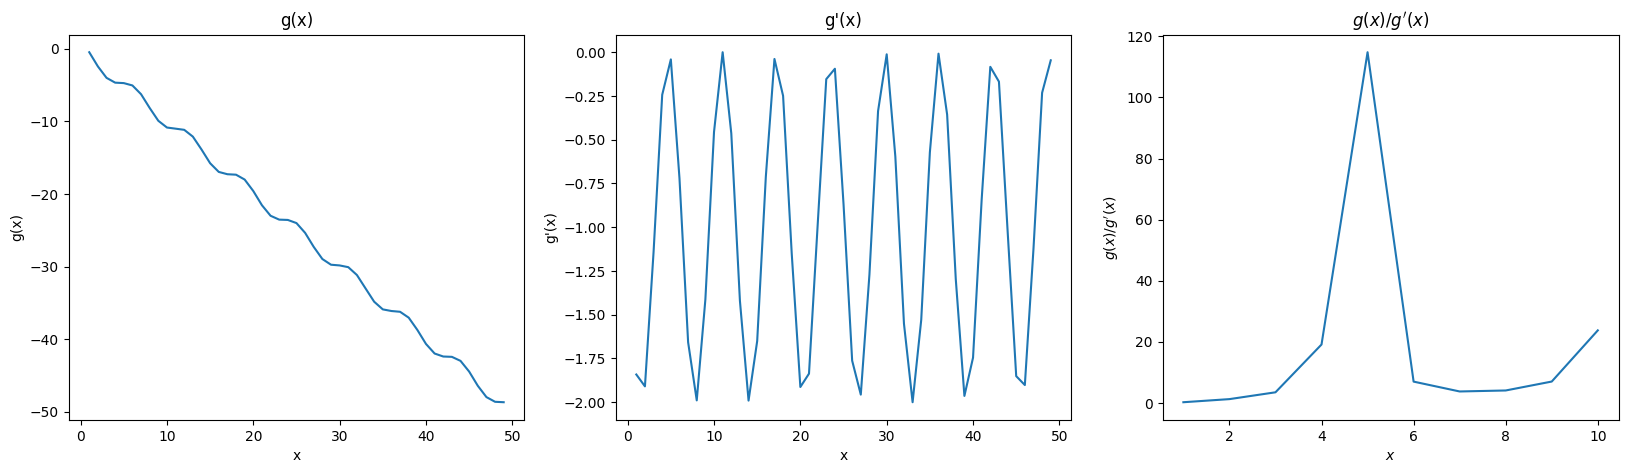

In [ ]:
# @title
x = range(1,50)
f = lambda x: (np.cos(x)-x)
f_prim = lambda x: (-1*np.sin(x)-1)
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].plot(x, f(x))
axs[0].set_xlabel("x")
axs[0].set_ylabel("g(x)")
axs[0].set_title("g(x)")
axs[1].plot(x,f_prim(x))
axs[1].set_xlabel("x")
axs[1].set_ylabel("g'(x)")
axs[1].set_title("g'(x)")
axs[2].plot(x[0:10], (f(x[0:10])/f_prim(x[0:10])))
axs[2].set_xlabel("$x$")
axs[2].set_ylabel("$g(x)/g'(x)$")
axs[2].set_title("$g(x)/g'(x)$")

plt.show()

Wykres $g'(x)$ ukazuje wyraźne oscylacje wartości, co sugeruje, że aktualizacje $x_n$ mogą być nieregularne. Widzimy to także na wykresie funkcji $\frac{g'(x)}{g(x)}$ - wartość $x$ znacznie wpływa na tempo zbieżności metody. Dla przykładu, aktualizacje $x_n$ dla $x_0 = 1, 2$ bądź $9$ będą znacznie mniejsze, niż dla np. $x_0 = 5$. W związku z tym przyjrzymy się zmianie tempa zbieżności w zależności od kroku $h$ dla $x_0 = 1,2,9$ oraz $30$.

In [ ]:
print(f(30)/f_prim(30))

2493.71750868151


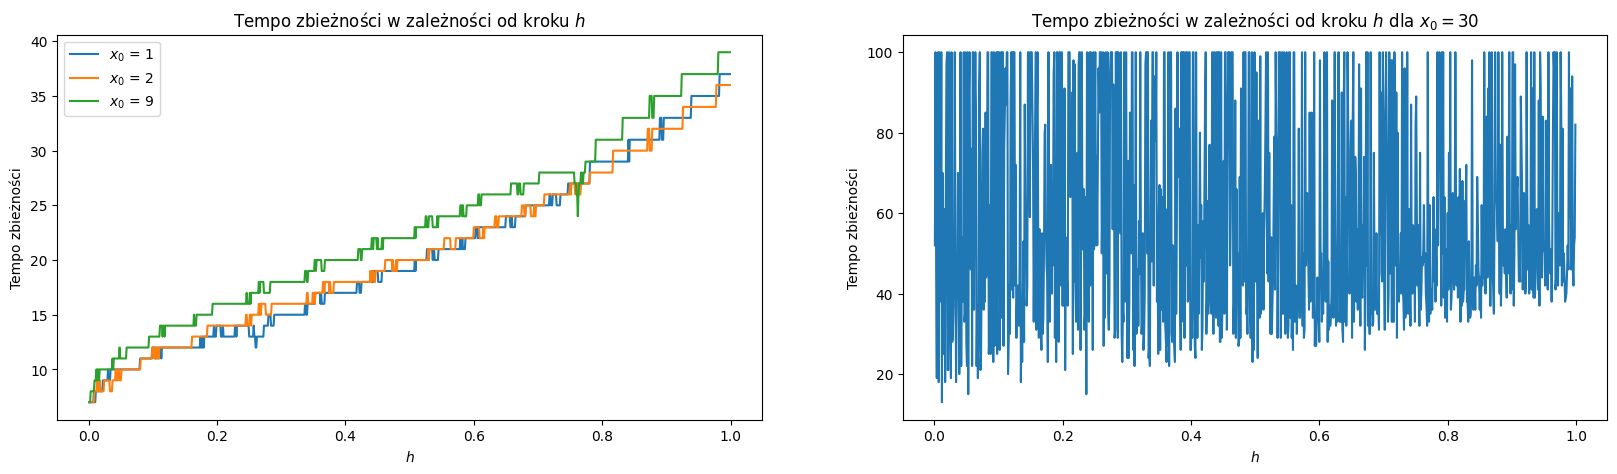

In [ ]:
# @title
f = lambda x: (np.cos(x)-x)
h_min = 10**(-3)
h_max = 1
h_steps = np.arange(h_min, h_max, h_min)
x0_range = [1, 2, 9, 30]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(0, len(x0_range)):
  count = 0
  iter = np.zeros(len(h_steps))
  for h in h_steps:
    result = newton(f, x0_range[i], 10**(-16), h)
    iter[count] = result[1]
    count += 1
  if i<3:
    axs[0].plot(h_steps, iter, label=f"$x_0$ = {x0_range[i]}")
axs[0].set_ylabel("Tempo zbieżności")
axs[0].set_xlabel("$h$")
axs[0].set_title("Tempo zbieżności w zależności od kroku $h$")
axs[0].legend()
axs[1].plot(h_steps, iter)
axs[1].set_ylabel("Tempo zbieżności")
axs[1].set_xlabel("$h$")
axs[1].set_title("Tempo zbieżności w zależności od kroku $h$ dla $x_0=30$")
plt.show()

Na przedstawionym wykresie po lewej stronie obserwujemy, że w miarę wzrostu kroku $h$, tempo zbieżności maleje. Najbardziej efektywne wyniki uzyskujemy dla $x_0=1$  oraz $x_0=2$. W przypadku wykresu dla $x_0=30$ nie zauważamy wyraźnej zależności między wielkością kroku $h$ a tempem zbieżności. Liczba iteracji waha się chaotycznie między 20 a 100 w różnych krokach.

Punkt przecięcia funkcji dla $g_1$ oraz $g_2$ dla $x_0 = 2$ i $h=0.001$:

In [ ]:
newton(f, 2, 10**(-16), 0.001)[0]

0.7390851332151607

# **Zadanie 4**


---


Metoda Newtona nie działa dla funkcji $h(x) = x^3 +x^2-1$ gdy startujemy z warunkiem początkowym $x_0=0$, ponieważ pochodna tej funkcji w zerze wynosi 0:

$$h'(x) = 3x^2+2x$$
$$h'(0) = 0$$

W wyniku tego, aktualizacja $x_n$ staje się niemożliwa z powodu dzielenia przez zero w ilorazie $\frac{h(x_0)}{h'(x_0)}$. \

Aby metoda działała poprawie, musimy wybrać taki punkt początkowy, aby iloraz $\frac{h(x_0)}{h'(x_0)}$ nie był bliski zeru. Wtedy zapewnimy skuteczność metody oraz szybką zbieżność do szukanego pierwiastka. Przykładowym takim punktem może być $x_0=1$.


In [ ]:
h = lambda x: x**3+x**2-1
newton(h,1,10**(-16),0.001)[0]

0.7548776662466927

# **Zadanie 5**


---


Naszym celem jest odnalezienie wartości $y=\frac{1}{\sqrt{x}}$. Zatem funkcja $h$ powinna przyjmować $y$ jako argument, co prowadzi nas do postaci: \
$h(y) = y-\frac{1}{\sqrt{x}}$. \

Jednakże, aby skorzytać z metody Newtona, potrzebujemy pochodnej funkcji $h$. Dla powyższej postaci $h'(y) = 1$, przez co krok iteracyjny metody Newtona przyjmuje postać:\
$y_{n+1} = y_n - \frac{h(y_n)}{h'(y_n)} = \frac{1}{\sqrt{x}}$. Zatem równanie $h(y) = y-\frac{1}{\sqrt{x}}$ nie przynosi żadnych rezultatów. \

Możemy jednak zapisać równanie w postaci $h(y)=y^2-\frac{1}{x}$. Wówczas, krok iteracyjny metody Newtona będzie miał formę:\
$h(y_{n+1}) = \frac{y_n}{2}-\frac{1}{x\cdot y_n}$. \

W takim ujęciu, metoda Newtona będzie skutecznie zbiegać do poszukiwanej wartości.

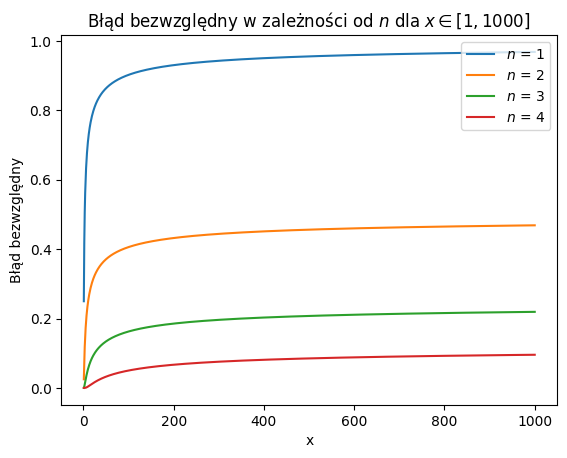

In [ ]:
# @title
x_range = range(1,1001)
for n in [1,2,3,4]:
  error = np.zeros(1000)
  count = 0
  for x in x_range:
    h= lambda y: y**2 - 1/x
    true_y = 1/x**(1/2)
    error[count] = np.abs(newton(h, 2, 10**(-16), 0.001,n)[0]-true_y)
    count+=1
  plt.plot(x_range, error, label=f"$n$ = {n}")
plt.legend(loc='upper right')
plt.title("Błąd bezwzględny w zależności od $n$ dla $x \in [1,1000]$")
plt.xlabel("x")
plt.ylabel("Błąd bezwzględny")
plt.show()

Wraz ze wzrostem $n$, błąd bezwzględny między bezpośrednim obliczeniem a interpolacją metodą numeryczną maleje. Analizując zależność od $x$, zauważamy, że błąd rośnie do wartości około $x=30$, po czym stabilizuje się i utrzymuje na zbliżonym poziomie.